# Dimensionsreduzierung

## Inhalt ##

1. Anwendung von Algorithmen zur Dimensionsreduzierung auf originalen Daten  
    1.1 Vorbereitung des Datensets für Algorithmen zur Dimensionsreduzierung  
    1.2 ("Standard") PCA  
    1.3 Kernel PCA  
    1.4 t-SNE  
    1.5 Vergleich der Ergebnisse
2. Dimensionsreduzierung auf Themenbereiche  
    2.1 Vorbereitung der Daten  
    2.2 Dimensionsreduzierung über Lagemaße (arithm. Mittelwert)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.2.1 Berechnung & Visualisierung der Themenbereiche  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.2.2 Nähere Untersuchung der gewonnenen Erkenntnisse  
    2.3 ("Standard") PCA  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.3.1 Berechnung & Visualisierung der Themenbereiche  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.3.2 Nähere Untersuchung der gewonnenen Erkenntnisse  
    2.4 Kernel PCA  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.4.1 Berechnung & Visualisierung der Themenbereiche  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.4.2 Nähere Untersuchung der gewonnenen Erkenntnisse  
    2.5 t-SNE  

In [86]:
%store -r columns_encoded
%store -r columns
%store -r data
%store -r data_encoded

columns_encoded = columns_encoded
columns = columns
data = data
data_encoded = data_encoded

In [87]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE

# 1. Anwendung von Algorithmen zur Dimensionsreduzierung auf originalen Daten

## 1.1 Vorbereitung des Datensets für Algorithmen zur Dimensionsreduzierung

Damit die verwendeten Algorithmen zur Reduktionsreduzierung die Daten korrekt verarbeiten können, müssen ausschließlich numerische Features übergeben werden. Mithilfe des One-Hot-Encodings im Preprocessing wurden jedoch sowohl die demographischen Angaben wie Studiengang und Geschlecht als auch die Freitextfelder "Lieblingssportart", "Lieblingsessen" & "Lieblingsmusiker*in" (sowie das neue Feature "Genre") bereits in numerische Features übersetzt. Wie die Übersicht zeigt, sind somit bereits in den vorverarbeiteten Daten nur noch numerische Daten enthalten, sodass diesbezüglich keine weiteren Bearbeitungen notwendig sind.

In [4]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 82 columns):
 #   Column                                                                                                                      Non-Null Count  Dtype
---  ------                                                                                                                      --------------  -----
 0   Alter                                                                                                                       62 non-null     int64
 1   Als wie sportlich würdest du dich einschätzen?                                                                              62 non-null     int64
 2   Welche Rolle spielt für dich gesunde Ernährung?                                                                             62 non-null     int64
 3   Wie gerne gehst du Essen oder Trinken?                                                                                      62 non-null  

Eine Skalierung der Daten ist notwendig, damit die Clustering-Algorithmen keine verschiedenen Zahlenräume bei der Berechnung nutzen, die z. B. Features mit höheren Werten fälschlicherweise als "relevanter" erscheinen lassen. Zwar sind aufgrund der Form der Datenerhebung bereits viele der Features auf Werte von 1-5 beschränkt; Einige Features wie z. B. das Alter lassen aber einen größeren Zahlenbereich zu, sodass eine Sklarierung durchaus sinnvoll bleibt. Außerdem bleibt das Vorgehen somit auch bei der (nachträglichen) Erweiterung der Features und/oder deren Werte anwendbar.

In [5]:
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data_encoded), columns=columns_encoded)

data_scaled.shape

(62, 82)

## 1.2 ("Standard") PCA

Die Hauptkomponentenanalyse (PCA) ist eine der verbreitetsten Verfahren zur Reduktionsreduzierung und versucht über die Berechnung der Eigenvektoren einer Kovarianzmatrix lineare Zusammenhänge in den Features eines Datensets zu erkennen. Insofern die Daten lineare Zusammenhänge aufweisen, liefert PCA in vergleichsweise schneller Berechnungszeit gute Ergebnisse. Außerdem ist PCA vergleichsweise "einfach" zu benutzen, da neben der Anzahl der zu berechnenden Dimensionen (n_components) keine weiteren Parameter angegeben werden müssen.

Da es sich bei dem Datenset um reelle Daten (und keine "Modelldaten") handelt, und zudem vergleichsweise wenig Datenpunkte enthalten sind, kann angenommen werden, dass PCA das Datenset nur bedingt gut verarbeiten kann. Da die Daten zur Visualisierung in einem 2D-Scatterplot dargestellt werden sollen, ist die Wahl von n_components=2 naheliegend. Theoretisch könnten zusätzlich ein paar wenige weitere Dimensionen (z. B. über Größe, Farbe, etc.) dargestellt werden; Da durch andere Algorithmen aber im Folgenden ohnehin noch weitere Optionen zur Dimensionsreduzierung untersucht werden, wird hier ausschließlich die Reduktion auf zwei Dimensionen betrachtet. 

In [6]:
# Angabe der gewünschten Dimensionen
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data_scaled)
X_pca.shape

(62, 2)

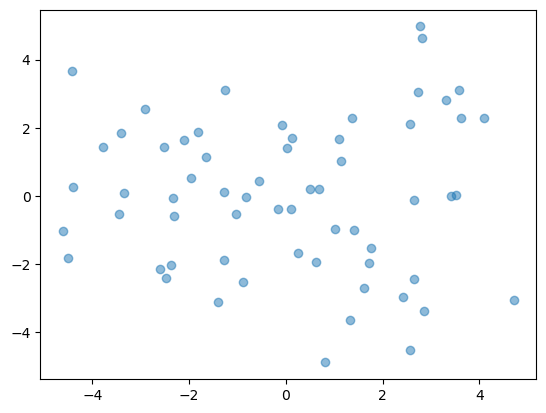

In [7]:
plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.5)

In [8]:
pca.explained_variance_ratio_

array([0.07503312, 0.06022329])

#### Ergebnisse / Beobachtungen

In der Visualisierung der durch PCA reduzierten Daten ist zu erkennen, dass diese sich recht gleichmäßig auf den Achsen bzw. den Zahlenraum der berechneten Features verteilen. Gleichzeitig sind keine unmittelbaren Cluster zu erkennen. Dieses Ergebnis passt zu den vorab formulierte Annahme, dass aufgrund der geringen Anzahl der Datenpunkte keine offensichtlichen (linearen) Zusammenhänge zwischen den Datenpunkten bestehen.

Ob die Dimensionsreduzierung für die weitere Untersuchung "brauchbar" ist, lässt sich rein aus der Visualisierung nicht feststellen, da es sich bei den berechneten Features um Abstraktionen handelt, die nicht als "richtig" oder "falsch" interpretierbar sind. Lediglich die "explained variance ratio" kann einen möglichen Anhaltspunkt zur Bewertung der Reduzierung liefern, die für jedes der berechneten Features ein Maß dafür angibt, wie viel Prozent der absoluten Varianz der Ursprungsdaten sie abdeckt. Diese weist mit Werten von 0.07 und 0.06 darauf hin, dass verhältnismäßg wenig Informationen der Ursprungsdaten abgebildet werden können. Aufgrund des Ziels, die Daten auf zwei Dimensionen abzubilden, kann dieser Wert nicht z. B. durch die Erhöhung der Anzahl an Dimensionen (n_components) optimiert werden und muss vorerst hingenommen werden.

## 1.3 Kernel PCA

Kernel-PCA erlaubt als Variante von PCA das Festlegen von weiteren Parametern wie z. B. eines "Kernels", der zur Berechnung genutzt wird. Hierdurch können auch nicht-lineare Strukturen erkannt und möglichst derart in die berechneten Dimensionen bzw. Features integriert werden, das der Informationsgehalt im Vergleich zu den Ausgangsdaten größer bleibt. Unter der Annahme, dass das Datenset aufgrund seiner Größe - wenn -  eher nicht-lineare Zusammenhänge aufweisen, sollte Kernel PCA zielführerende Ergebnisse als "Standard" PCA liefern. Dafür müssen für die Nutzung von Kernel PCA bestimmte Parameter übergeben werden, die die Nutzung etwas komplexer machen.

Eine automatische "GridSearch" zum Finden geeigneter Parameter ist nicht möglich, da intuitiv nicht klar ist, wie die "Scoring"-Funktion gewählt werden kann, d. h. wie entschieden wird, ob eine Reduzierung "gut" ist. Stattdessen werden mithilfe einer Hilfsfunktion  die Berechnungserbnisse von verschiedenen Kernel PCA-Instanzen mit verschiedenen Parameterwerten zusammen ausgegeben, um diese visuell (z. B. das Maß der Streuung, erkennbare Cluster,...) miteinander vergleichen zu können. 

Für die Eingabe werden die Parameter wie folgt gewählt:
- n_components: Die Anzahl der zu berechnenden Dimensionen wird auf zwei beschränkt (n_components=2), da die Ausgabe in einem 2D-Plot erfolgen soll.
- kernel: Es werden die drei Kernels "rbf", "poly" & "sigmoid" übergeben, um das Verhalten für verschiedene Kernelfunktionen auswerten zu können. Der Kernel "linear" würde zur Berechnung im Sinne eines "Standard"-PCA Modells führen, und wird deshalb nicht genutzt.
- gamma: Da der Wert per Default als "1/Anzahl Features" (ca. 0.012 bei der gegebenen Featureanzahl von 81) festgelegt wird, werden als mögliche weitere Werte solche getestet, die im unmittelbaren Umfeld dieses Wertes liegen.

In [9]:
# Input:
#   - results: Computation results as an array of tuples with the form [("<<plot title>>", [<<2-dimensional array>>])],
#              where the 2-dimensional array describes the x- & y-position of each data point & the title should describe the chosen parameter-values
#   - figsize_columns: number of columns which are used to layout the plotted graphs. The number of rows is depending on the number of 'results' and the given 'figsize_columns'.
#   - figsize (optional): Adjusts the width/height of the individual graphs, in case the scaling is different for different computations
# Ouput: The plotted graphs which represent the given data from 'results'
import math

def display_reduction_results(results, figsize_columns, figsize=(15, 15)):
    figsize_rows = math.ceil(len(results) / figsize_columns)
    fig, ax = plt.subplots(figsize_rows, figsize_columns, figsize=figsize)
    fig.tight_layout(pad=3)

    for i in range(len(results)):
        plt.subplot(figsize_rows, figsize_columns, i+1).set_title(results[i][0])
        
        if len(results[i][1][0]) <= 2:
            plt.subplot(figsize_rows, figsize_columns, i+1).scatter(results[i][1][:,0], results[i][1][:,1], alpha=0.4)
        else:
            plt.subplot(figsize_rows, figsize_columns, i+1).scatter(results[i][1][:,0], results[i][1][:,1], c=results[i][1][:,2], alpha=0.4)

In [10]:
n_components = [2]
gammas = [None, 0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.5, 0.6]
kernels = ["rbf", "poly", "sigmoid"]

kpca_results = []

for kernel in kernels:
    for gamma in gammas:
        for components in n_components:
            kpca = KernelPCA(n_components=components, gamma=gamma, kernel=kernel).fit_transform(data_scaled)
            parameter_string = "Comp: " + str(components) + ", Gamma: " + str(gamma) + ", Kernel: " + str(kernel)
            kpca_results.append((parameter_string, kpca))

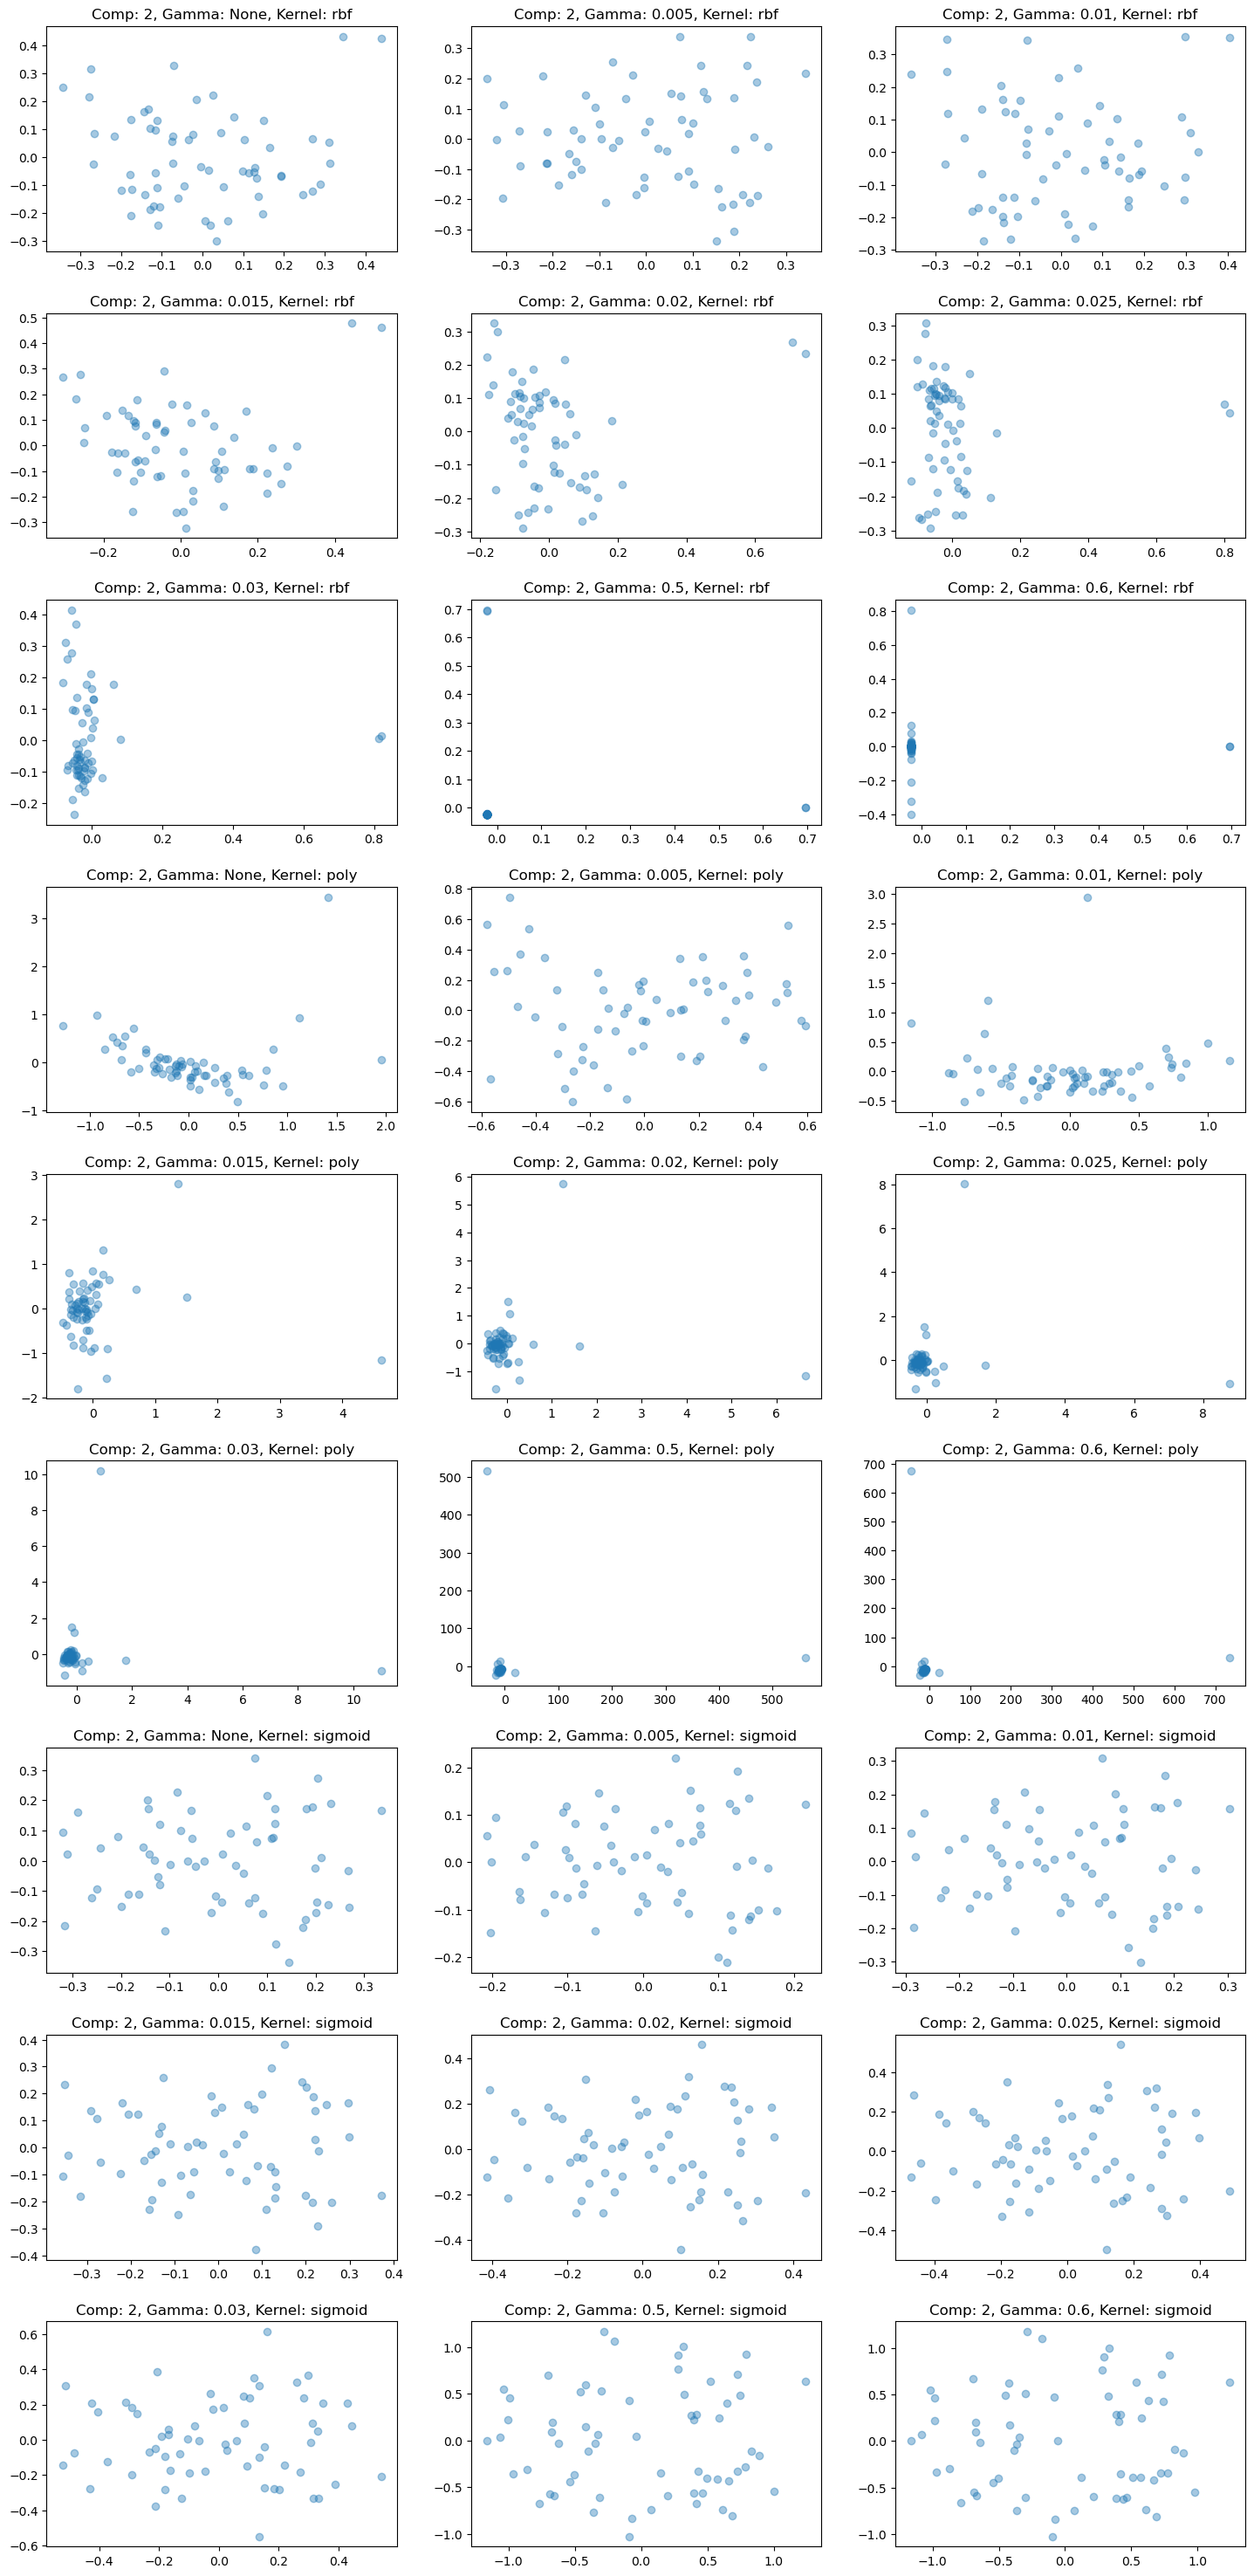

In [11]:
display_reduction_results(kpca_results, 3, (15, 30))

#### Ergebnisse / Beobachtungen
Im Vergleich der Plots ist schnell zu erkennen, dass einige Paramterwerte bzw. Kombinationen wie z. B. gamma-Werte ab 0.5 für den "rbf"-Kernel oder gamma-Werte ab 0.02 für den "poly"-Kernel zu dichteren Clustern führen. Weiterhin sind in diesen Plots Ausreißer zu erkennen (insbesondere beim "poly"-Kernel). Vor der weiteren Untersuchung müssten diese Berechnungen noch einmal näher untersucht werden, beispielsweise durch eine andere Darstellung mit Perzentilen oder logarithmische Skalen. Da die Daten in diesen Reduzierungen aber insgesamt offenbar zu stark "komprimiert" werden, werden diese vorerst nicht weiter betrachtet.

Ansonsten scheinen die übrigen Parameter-Kombinationen die Daten einigermaßen gleich in dem jeweiligen Zahlenraum zu verteilen. Rein aus der Darstellung lässt sich also keine Präferenz für eine bestimmte Parameterkombination erkennen. Die Eignung würde sich erst in weiteren Untersuchung, z. B. der Einfärbung gefundener Cluster, zeigen. Es lässt sich jedoch feststellen, dass die Default-Parameter von Kernel PCA rein von der Betrachtung der Plots nicht bessere/schlechtere Ergebnisse zu liefern scheint, als andere Parameter-Konfigurationen.

## 1.4 t-SNE

Analog zu Kernel PCA können auch mit t-SNE bei der Dimensionsreduzierung nicht-lineare Strukturen erkannt werden, wodurch auch hier intuitiv bessere Ergebnisse bzgl. der Bewahrung des Informationsgehalts der Urspungsdaten erzielt werden könnten. Im Gegensatz zu (Kernel) PCA gilt t-SNE jedoch als komplexer in der Berechnung und benötigt ähnlich zu Kernel PCA Parameter, die die Berechnung beeinflussen können. Aufgrund der geringen Anzahl an Datenpunkten kann die erhöhte Komplexität des Algorithmus bei der Berechnung vorerst vernachlässigt werden. Auch die Vorschaltung von PCA mit anschließendem t-SNE zur Steigerung der Performanz wurde für diesen Datensatz als nicht nötig empfunden.

Analog zum Vorgehen der Parametersuche für Kernel PCA werden im Folgenden einige Berechnungen von t-SNE mit verschiedenen Werten für den Parameter "perplexity" ausgegeben, um diese miteinander vergleichen zu können. Laut der offiziellen [Dokumentation](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) sollte der "perplexity"-Wert zwischen 5 und 50 gewählt werden. Da der Default-Wert für den "perplexity"-Parameter bei 30 liegt, werden insbesondere Werte in der Umgebung dieses Richtwertes untersucht und zusätzlich Randwerte  zum Vergleich mit den "Extremwerten" berechnet.

In [12]:
perplexities = [1, 2, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 60]

tsne_results = []

for perplexity in perplexities:
    tsne = TSNE(perplexity=perplexity, random_state=0).fit_transform(data_scaled)
    parameter_string = "Perplexity: " + str(perplexity)
    tsne_results.append((parameter_string, tsne))

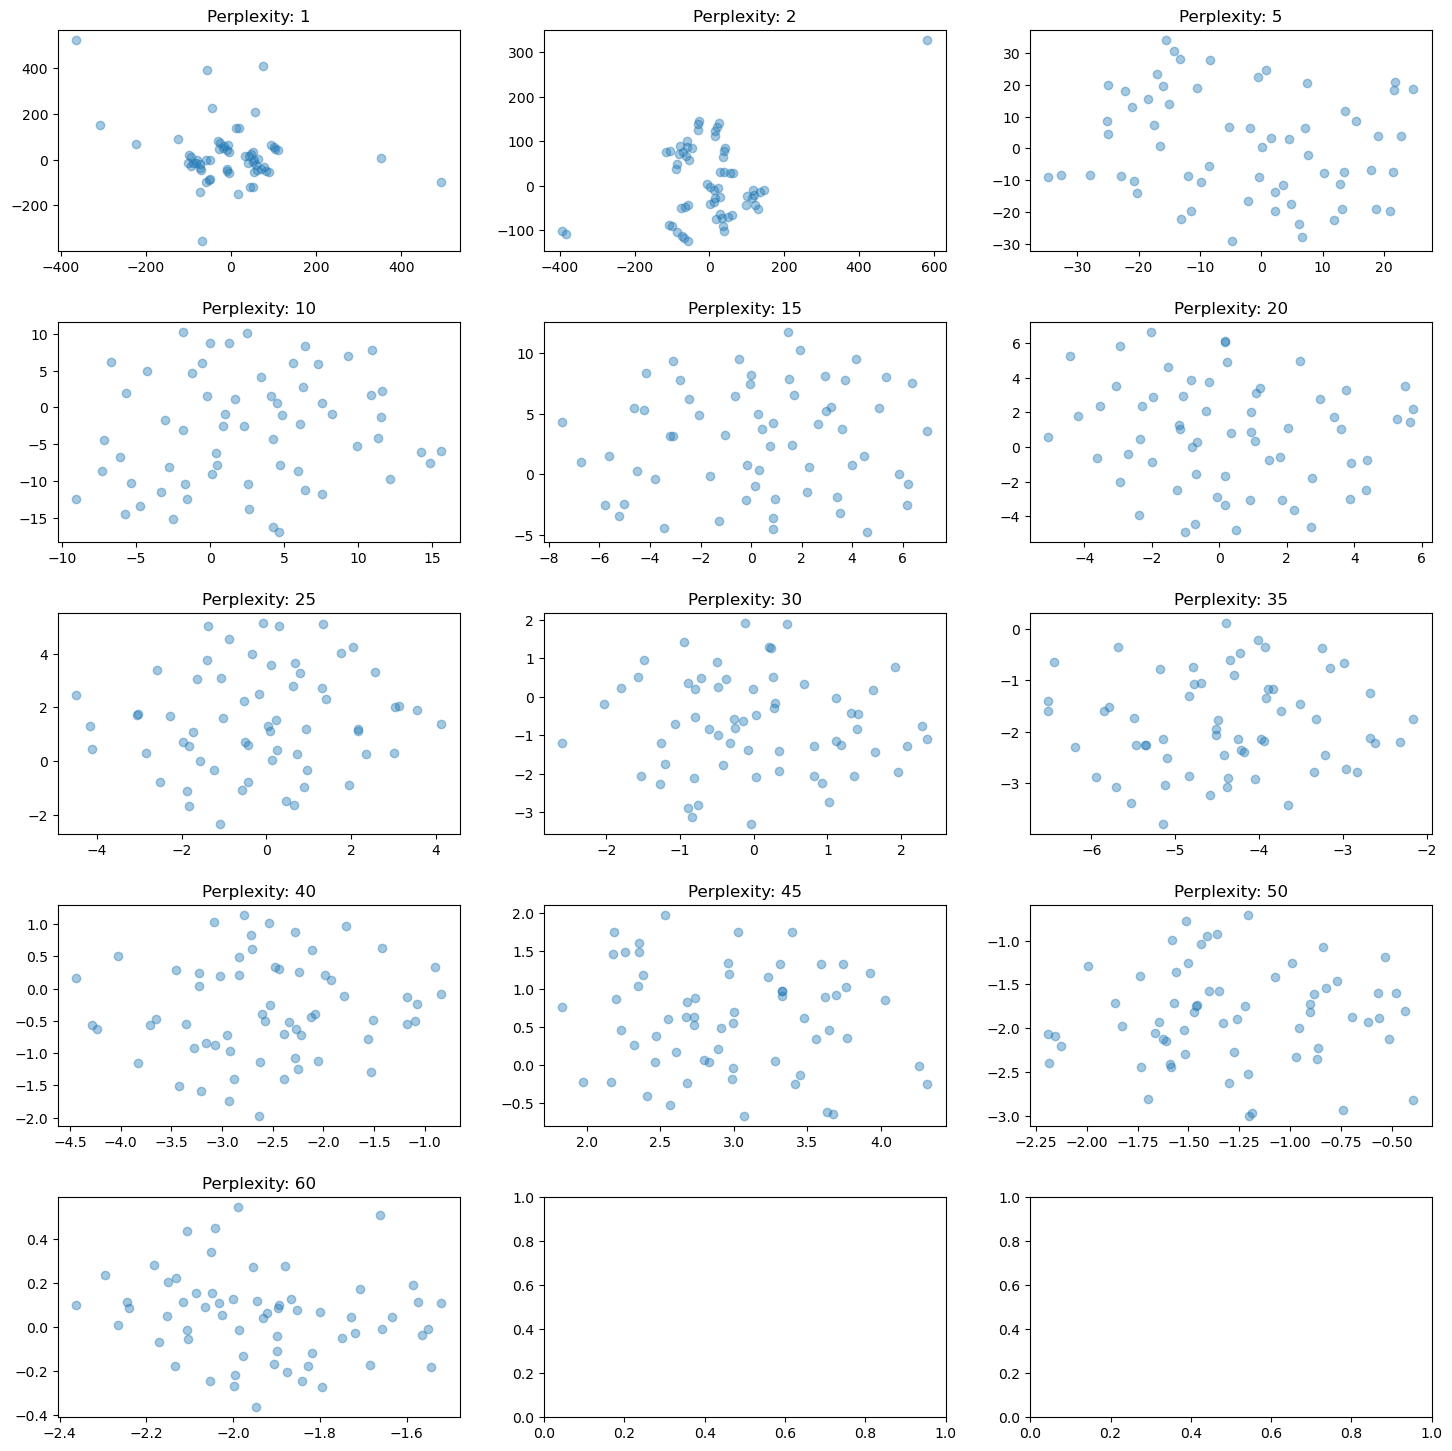

In [13]:
display_reduction_results(tsne_results, 3)

#### Ergebnisse / Beobachtungen
Insbesondere bei niedrigeren "perplexity"-Werten sind schon auf den ersten Blick eindeutige Cluster zu erkennen. Wie jedoch bspw. in diesem [Online Artikel](https://distill.pub/2016/misread-tsne/) beschrieben, ergeben sich solche Cluster lediglich durch die starke Gewichtung lokaler Strukturen im Algorithmus und haben für die praktische Auswertung so gut wie keine Bedeutung (*"[...] those “clumps” aren’t meaningful. [...] low perplexity values often lead to this kind of distribution. Recognizing these clumps as random noise is an important part of reading t-SNE plots. [...]"*). Da beim Graphen des "perplexity"-Werts 30 zumindest kleinere Strukturen erkennbar sind, kann der Default-Wert für "perplexity" als verwendbar angesehen werden (solange keine nähere Untersuchung der Eignung wiederspricht).

## 1.5 Vergleich der Ergebnisse

Es lässt sich feststellen, dass alle drei Verfahren grundsätzlich plausibel aussehende Dimensionsreduzierungen durchführen können, die die Datenpunkte gleichmäßig verteilen. Es lassen sich lediglich Unterschiede in der Skalierung der Features feststellen: So verteilen sich die Datenpunkte bei PCA und Kernel PCA recht gleichmäßig im positiven & negativen Bereich der Achsen, wobei sich die Werte bei Kernel-PCA in einem kleineren Zahlenraum bewegen. Bei t-SNE liegen die Datenpunkte bei einem der Features vollständig im negativen Zahlenbereich.

Rein aus diesen Beobachtungen und den Plots lassen sich aber keine weiteren Schlüsse auf die "Korrektheit" oder die "Nützlichkeit" ziehen. Vorerst werden von allen drei Verfahren jeweils eine Reduzierung mit plausiblen Parameter-Werten exportiert. Diese werden dann später anhand der Clusterings auf ihre Aussagekraft bewertet.

Text(0.5, 1.0, 't-SNE')

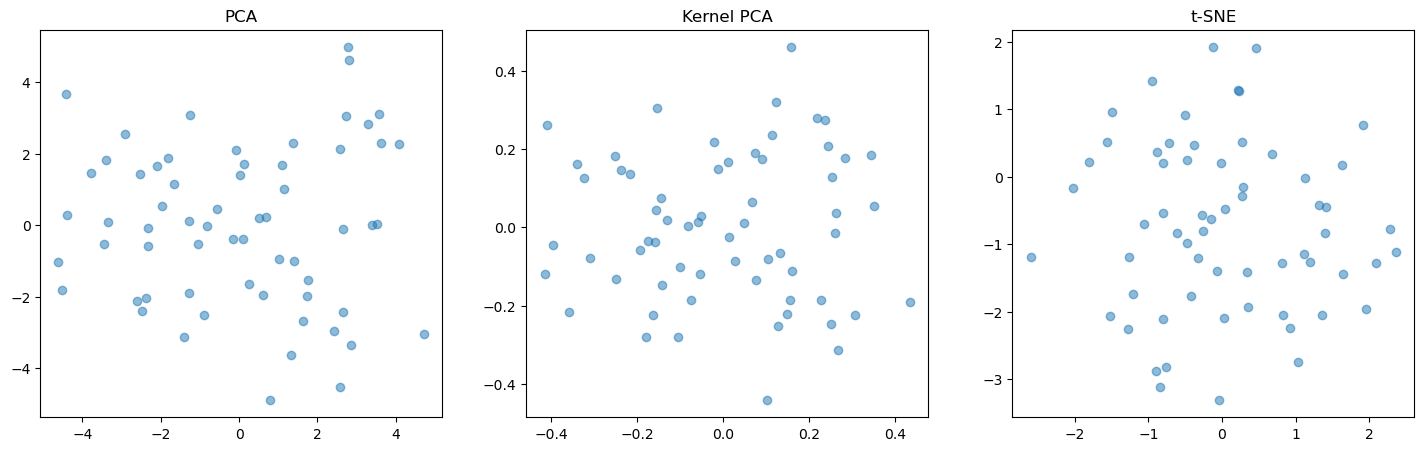

In [14]:
data_original_reduced_pca = PCA(n_components=2).fit_transform(data_scaled)
data_original_reduced_pca = pd.DataFrame(data_original_reduced_pca, columns=["Hyperparameter1", "Hyperparameter2"])

data_original_reduced_kpca = KernelPCA(n_components=2, gamma=0.02, kernel="sigmoid").fit_transform(data_scaled)
data_original_reduced_kpca = pd.DataFrame(data_original_reduced_kpca, columns=["Hyperparameter1", "Hyperparameter2"])

data_original_reduced_tsne = TSNE(perplexity=30, random_state=0).fit_transform(data_scaled)
data_original_reduced_tsne = pd.DataFrame(data_original_reduced_tsne, columns=["Hyperparameter1", "Hyperparameter2"])

fig, axes = plt.subplots(1,3, figsize=(15, 5))
fig.tight_layout(pad=3)
plt.subplot(1, 3, 1).scatter(data_original_reduced_pca["Hyperparameter1"], data_original_reduced_pca["Hyperparameter2"], alpha=0.5)
plt.subplot(1, 3, 1).set_title("PCA")
plt.subplot(1, 3, 2).scatter(data_original_reduced_kpca["Hyperparameter1"], data_original_reduced_kpca["Hyperparameter2"], alpha=0.5)
plt.subplot(1, 3, 2).set_title("Kernel PCA")
plt.subplot(1, 3, 3).scatter(data_original_reduced_tsne["Hyperparameter1"], data_original_reduced_tsne["Hyperparameter2"], alpha=0.5)
plt.subplot(1, 3, 3).set_title("t-SNE")

In [15]:
%store data_original_reduced_pca
%store data_original_reduced_kpca
%store data_original_reduced_tsne

Stored 'data_original_reduced_pca' (DataFrame)
Stored 'data_original_reduced_kpca' (DataFrame)
Stored 'data_original_reduced_tsne' (DataFrame)


# 2. Dimensionsreduzierung auf Themenbereiche

Bei der Korrelationsanalyse wurde deutlich, dass in den Datenpunkten am ehesten die Features (bzw. Antworten zu Fragen) korrelieren, die inhaltlich ähnliche Interessen abfragen. Diese Beobachtung passt auch zu der Intuition, dass Menschen sich grundsätzlich für gewisse Lebensbereiche interessieren, und Fragen zu demselben Lebensbereich im Allgemeinen ähnlich beantworten. Beispiele hierführ sind die Korrelation der Antworten zu den Fragen *"Wie sehr interessierst du dich für darstellende Künste wie Schauspiel, Tanz oder Gesang?"* und *"Wie sehr interessierst du dich für bildende Kunst wie Malen, Zeichnen oder Fotografie?"* mit einem Korrelationskoeffizienten von 0.7 oder der Korrelation von *"Prokrastinierst du, wenn du lernen müsstest?"* mit *"Wie häufig machst du Abgaben auf den letzten Drücker?"* mit einem Korrelationskoeffizienten von 0.5.

Ausgehend von dieser Beobachtung wäre es naheliegend bzw. denkbar, die gestellten Fragen bzw. Features inhaltlich nach bestimmten Bereichen zu gruppieren. Dabei gehen zwar die Korrelationen innerhalb der Themenbereiche in der Darstellung verloren; Dafür können den Datenpunkten bzw. Personen aber womöglich auf eine prägnantere Weise Eigenschaften zugeschrieben werden. Im Folgenden werden zunächst die Themenbereiche definiert, um dann für jeden Datenpunkt mithilfe von Lagemaßen und den bereits zuvor genutzten Algorithmen entsprechende Werte zu berechnen.

## 2.1 Vorbereitung der Daten

Da die Art und Strukturierung der Datenerhebung im Vorfeld bekannt war, können die Themenbereiche aus den Kapiteln des Fragebogen entnommen werden. Gleichzeitig lassen sich die Themenbereiche aber auch schon allein aus den Namen der Features erkennen. Letztendlich wurden die sieben Themenbereiche "Demographie", "Aktivität", "Kreativität", "Wissenschaft", "Soziales", "Studienverhalten" und "Persönlichkeit" definiert.

Zunächst werden noch einmal alle vorhandenen Featurenamen ausgegeben und anschließend pro Themenbereich in eigenen Arrays zusammengefasst.

In [16]:
columns_encoded.keys()

Index(['alter', 'sportlichkeit', 'ernaehrung', 'essengehen', 'kochen',
       'feiern', 'musik', 'lesen', 'schauspiel', 'filme', 'malen',
       'museumsbesuche', 'videospiele', 'social_media', 'technologie',
       'astronomie', 'naturwissenschaften', 'freiwilligenarbeit', 'soziales',
       'introvertiert', 'fomo', 'spontan', 'verwirrt', 'gluecklich',
       'geduldig', 'streitlustig', 'abenteuerlustig', 'studienzweifel',
       'studium_zufriedenheit', 'akademische_laufbahn', 'lerngruppe',
       'prokrastinieren', 'letzter_druecker', 'neue_lebensmittel', 'natur',
       'reisen', 'handwerk', 'sprachnachrichten', 'geld',
       'sportarten_Basketball', 'sportarten_Bouldern/Klettern',
       'sportarten_Football', 'sportarten_Fußball', 'sportarten_Handball',
       'sportarten_Hockey', 'sportarten_Kampfsport',
       'sportarten_Leichtathletik', 'sportarten_Rennrad/Mountainbike',
       'sportarten_Schwimmen', 'sportarten_Tanzen', 'sportarten_Tennis',
       'sportarten_Volleyball', 

In [88]:
cat_demography = ("Demographie", ["alter", "studiengang_bmi", "studiengang_bmt", "studiengang_daisy",
              "studiengang_mmi", "funktion_student*in", "geschlecht_weiblich"])

cat_activity = ("Aktivität", ["sportlichkeit", "ernaehrung", "essengehen", "kochen", "feiern",
              "sportarten_Basketball",
              "sportarten_Bouldern/Klettern",
              "sportarten_Football",
              "sportarten_Fußball",
              "sportarten_Handball",
              "sportarten_Hockey",
              "sportarten_Kampfsport",
              "sportarten_Leichtathletik",
              "sportarten_Rennrad/Mountainbike",
              "sportarten_Schwimmen",
              "sportarten_Tanzen",
              "sportarten_Tennis",
              "sportarten_Volleyball",
              "sportarten_Wassersport",
              "sportarten_Wintersport",
              "sportarten_Yoga",
              "lieblingssportart_badminton",
              "lieblingssportart_basketball",
              "lieblingssportart_bouldern",
              "lieblingssportart_fußball",
              "lieblingssportart_keine_lieblingssportart",
              "lieblingssportart_tischtennis"])

cat_creativity = ("Kreativität", ["musik", "lesen", "schauspiel", "filme", "malen", "museumsbesuche",
              "genre_lieblingsmusiker_alternative",
              "genre_lieblingsmusiker_electro",
              "genre_lieblingsmusiker_kein_lieblingsgenre",
              "genre_lieblingsmusiker_pop",
              "genre_lieblingsmusiker_rap_hip_hop",
              "genre_lieblingsmusiker_rock"])

cat_science = ("Wissenschaft", ["videospiele", "social_media", "technologie", "astronomie", "naturwissenschaften"])

cat_social = ("Soziales", ["freiwilligenarbeit", "soziales", "introvertiert", "fomo", "spontan", "verwirrt", "gluecklich", "geduldig", "streitlustig", "abenteuerlustig"])

cat_study = ("Studienverhalten", [ "studienzweifel", "studium_zufriedenheit", "akademische_laufbahn", "lerngruppe", "prokrastinieren", "letzter_druecker"])

cat_personality = ("Persönlichkeit", ["neue_lebensmittel", "natur", "reisen", "handwerk", "sprachnachrichten", "geld",
              "lieblingsessen_burger",
              "lieblingsessen_döner",
              "lieblingsessen_kein_lieblingsessen",
              "lieblingsessen_lasagne",
              "lieblingsessen_pasta",
              "lieblingsessen_pfannkuchen",
              "lieblingsessen_pizza",
              "lieblingsessen_sushi"])

all_categories = [cat_demography, cat_activity, cat_creativity, cat_science, cat_social, cat_study, cat_personality]

Die folgende Hilfsmethode iteriert für ein gegebenes Datenset und einem Model (zur Dimensionsreduzierung) über die definierten Themenbereiche und berechnet in einem neuen DataFrame für jeden Datenpunkt die Werte pro Themenbereich.

In [18]:
# Helper-method to perform dimensionality reduction for a given data and reduction model on predefined categories
# Input:
#   - data: DataFrame to be reduced
#   - model: Model which is used to perform reduction; Has to support the .fit_transform()-function
# Output: DataFrame, which used the given model to reduce the data to the predefined categories

def compute_categories(data, model):
    data_reduced = pd.DataFrame(columns=[category[0] for category in all_categories])
    for category in all_categories:
        model_trained = model.fit_transform(data[[columns_encoded[x] for x in category[1]]])
        data_reduced[category[0]] = model_trained[:,0]
    return data_reduced

## 2.2 Dimensionsreduzierung über Lagemaße (arithm. Mittelwert)

Der wohl intuitivste Weg, die Features der einzelnen Themenbereiche zusammenzufassen, ist die Berechnung des (arithmetischen) Mittelwertes pro Datenpunkt für jeweils alle im Themenbereich enthaltenen Features. Da hierfür kein Model genutzt wird, wird die Hilfsmethode an dieser Stelle (noch) nicht genutzt.

### 2.2.1 Berechnung & Visualisierung der Themenbereiche

In [89]:
data_topics_reduced_mean = pd.DataFrame(columns=[category[0] for category in all_categories])
for category in all_categories:
    dataframe_category_columns = data_encoded[[columns_encoded[cat] for cat in category[1]]]
    data_topics_reduced_mean[category[0]] = dataframe_category_columns.mean(axis=1)

data_topics_reduced_mean = data_topics_reduced_mean.round(2)
data_topics_reduced_mean

,Demographie,Aktivität,Kreativität,Wissenschaft,Soziales,Studienverhalten,Persönlichkeit
0,4.29,0.81,1.75,2.6,3.3,2.83,1.43
1,4.00,0.89,1.83,4.4,2.8,2.83,1.50
2,3.71,0.89,2.00,3.2,3.8,3.33,1.29
3,3.57,0.74,1.42,3.2,3.0,2.67,1.57
4,3.86,0.52,1.58,2.0,3.3,3.33,1.36
...,...,...,...,...,...,...,...
57,4.00,0.67,2.33,2.8,3.0,2.00,1.14
58,3.43,0.70,0.92,2.8,3.4,2.67,1.57
59,4.00,0.67,1.92,2.4,2.9,2.83,1.43
60,4.86,0.93,2.42,3.8,3.3,3.33,1.50


Zur ersten Untersuchung der berechneten Werte werden die reduzierten Daten in einem Pairplot dargestellt, der die Datenpunkte für jeweils zwei Themenbereiche aufspannt.

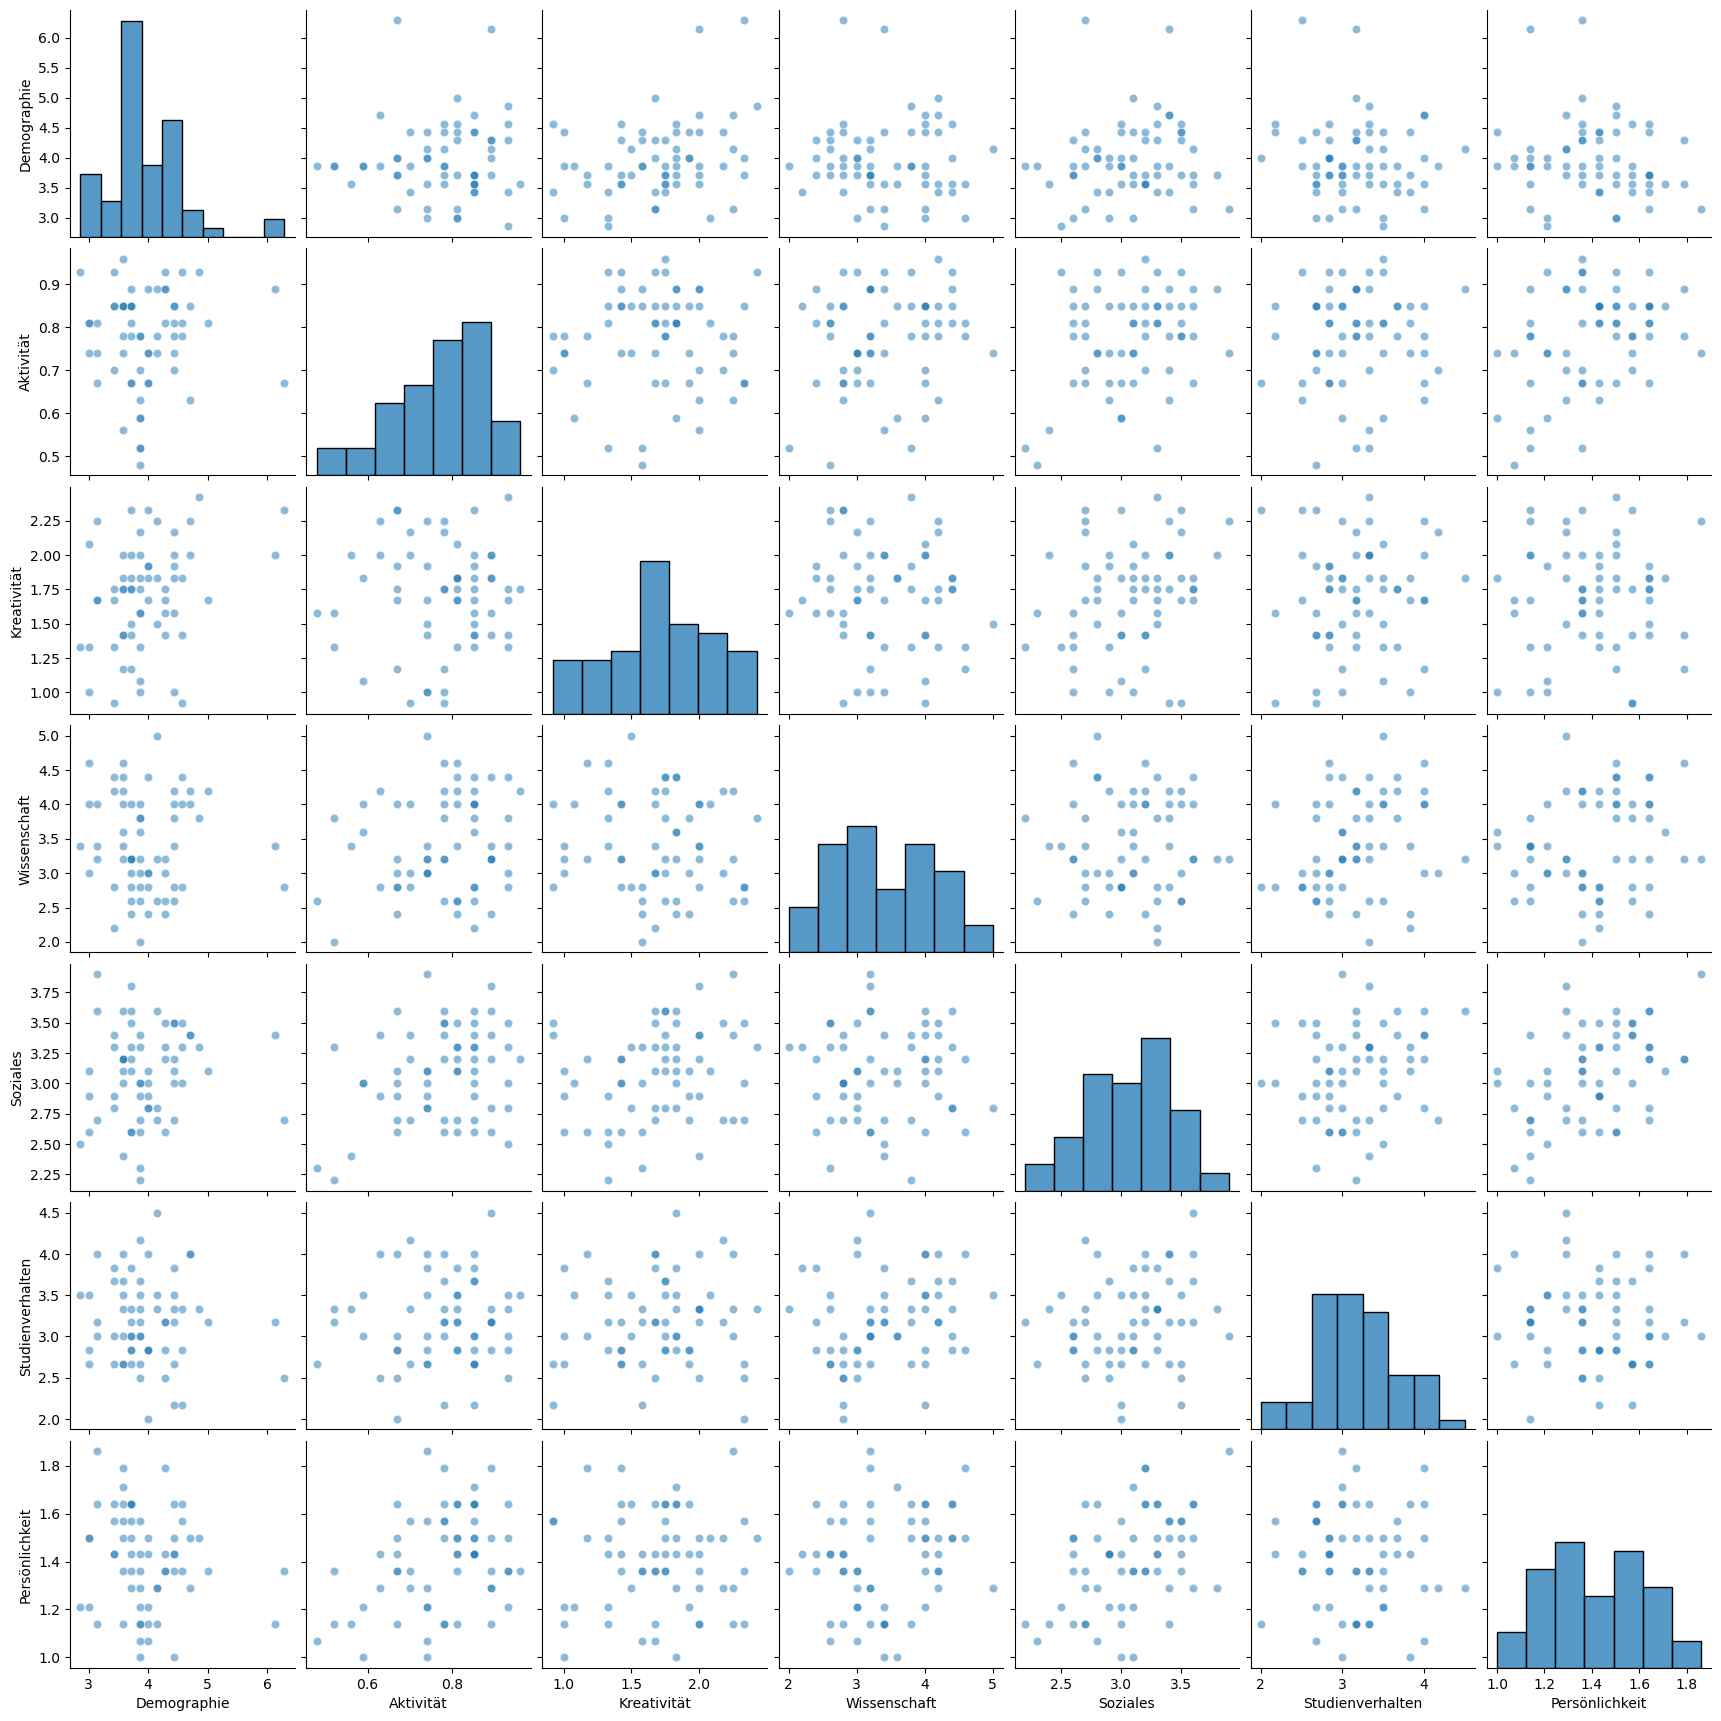

In [39]:
sb.pairplot(data_topics_reduced_mean, plot_kws={'alpha':0.5})

#### Ergebnisse / Beobachtungen
Beim Aufspannen der Datenpunkte über jeweils Paare von berechneten Themengebieten lässt sich zunächst feststellen, dass sich die Datenpunkte "gitterartig" anordnen. Das ist in der Nutzung des arithmetischen Mittelwertes als Berechnungsfunktion begründet, da pro Themenbereich aufgrund der Beschränkung auf Angaben zwischen 1-5 nur eine begrenzte Anzahl von möglichen Kombinationen an Antworten möglich war. Die berechneten Mittelwerte ordnen sich demnach auf einigen wenigen Werten ein.

Da die Korrelationen vor allem innerhalb der Themengebiete zu finden waren, ist es nicht verwunderlich, dass die Themengebiete zwischeneinander wenig Strukturen erkennen lassen. Dennoch sind kleinere Zusammenhänge zu erkennen: Beispielsweise gibt es so gut wie keine Datenpunkte bzw. Personen, die einen niedrigen "Aktivitäts"-Wert, aber gleichzeitig einen hohen "Persönlichkeits"-Wert besitzen. Da das Themenfeld "Persönlichkeit" auch Fragen nach Reisen und Zeit in der Natur abfragt, erscheint diese Schlussfolgerung plausibel.

### 2.2.2 Nähere Untersuchung der gewonnenen Erkenntnisse

Die einzige Ausnahme bei der "gitterartigen" Anordnung bildet das Themenfeld "Demographie", da hier durch die freie Eingabe eines Alters ein größerer Zahlenraum zur Auswahl stand. So sind in der ersten Spalte (bzw. Zeile) zwei Ausreißer zu erkennen, die einen "Demographie"-Wert über 4 zugewiesen bekommen haben. Zur näheren Untersuchung werden die Indizies ausgelesen und die ursprünglichen Daten betrachtet.

In [90]:
mask_age_cluster1 = data_topics_reduced_mean[cat_demography[0]] > 5.5
data_topics_reduced_mean[mask_age_cluster1]

,Demographie,Aktivität,Kreativität,Wissenschaft,Soziales,Studienverhalten,Persönlichkeit
6,6.29,0.67,2.33,2.8,2.7,2.50,1.36
8,6.14,0.89,2.00,3.4,3.4,3.17,1.14


In [91]:
data_encoded.loc[[6, 8]][[columns_encoded[x] for x in cat_demography[1]]]

,Alter,Studiengang Bmi? (encoded),Studiengang Bmt? (encoded),Studiengang Daisy? (encoded),Studiengang Mmi? (encoded),Funktion Student*In? (encoded),Geschlecht (weiblich?)
6,41,0,0,0,1,1,1
8,42,0,0,1,0,0,0


In der Ausgabe der beiden Datenpunkte lässt sich feststellen, dass es sich hierbei um die Personen mit dem höchsten Alter handelt. Dies zeigt den Vorteil der Nutzung des arithmetischen Mittels zur Berechnung der reduzierten Werte: Die Reduzierung ist in ihrer Funktionsweise vergleichsweise verständlich. Es zeigt sich aber auch, dass Datenpunkte auch irreführend hohe Werte erhalten können, wenn sie in vielen Merkmalen "True" zugewiesen bekommen. Als Beispiel zeigt sich im Datenpunkt 6, dass er nicht nur aufgrund seines Alters einen hohen Wert bekommen hat, sondern auch einfach aufgrund der Tatsache, dass die Person weiblich und Student*in ist.

In [42]:
%store data_topics_reduced_mean

Stored 'data_topics_reduced_mean' (DataFrame)


## 2.3 ("Standard") PCA

Ein Nachteil der Berechnung über das arithmetische Mittel ist, dass alle enthaltenen Features gleich gewichtet werden, insbesondere wenn etwa durch das One-Hot-Encoding von Sportarten und Genres unverhältnismäßig viele Feature hinzugezogen werden, die häufig den Wert "0" enthalten und die Berechnung somit ggf. verfälschen. Außerdem erhalten hierdurch eigentlich kategorische Features einen numerischen Wert, wodurch z. B. die Geschlechter unterschiedliche Gewichtungen in der Berechnung erhalten. Deshalb wird im Folgenden mithilfe des PCA versucht, die Werte auf komplexere Art berechnen zu lassen. Da jeder Themenbereich auf exakt einen Wert reduziert werden soll, wird der Parameter "n_components" jeweils auf 1 gesetzt.

### 2.3.1 Berechnung & Visualisierung der Themenbereiche

In [102]:
pca = PCA(n_components=1)

data_topics_reduced_pca = compute_categories(data_scaled, pca)
data_topics_reduced_pca

,Demographie,Aktivität,Kreativität,Wissenschaft,Soziales,Studienverhalten,Persönlichkeit
0,0.579667,-0.467679,-0.346721,-1.481797,0.405950,-1.635010,-0.420644
1,0.320618,-1.031154,-1.074159,1.617876,-0.517746,-1.494638,0.395413
2,0.061569,2.739008,-1.633862,-0.669291,-1.797866,-1.035561,1.817699
3,-0.067956,-0.233852,2.076496,0.105325,0.121731,-0.903822,-0.274411
4,-0.010687,0.318784,1.588000,-2.294303,-0.164162,2.018491,0.070244
...,...,...,...,...,...,...,...
57,0.320618,2.742566,-2.831210,-1.345619,-0.158858,-2.657732,-0.404015
58,-0.811401,-0.331900,3.826305,-1.985446,0.103726,0.038180,-1.398660
59,-0.495083,-0.190553,-0.753476,-1.918051,-0.498246,1.668469,-1.679744
60,2.051874,0.486303,-3.344487,1.385794,-0.388389,-1.960236,-1.198377


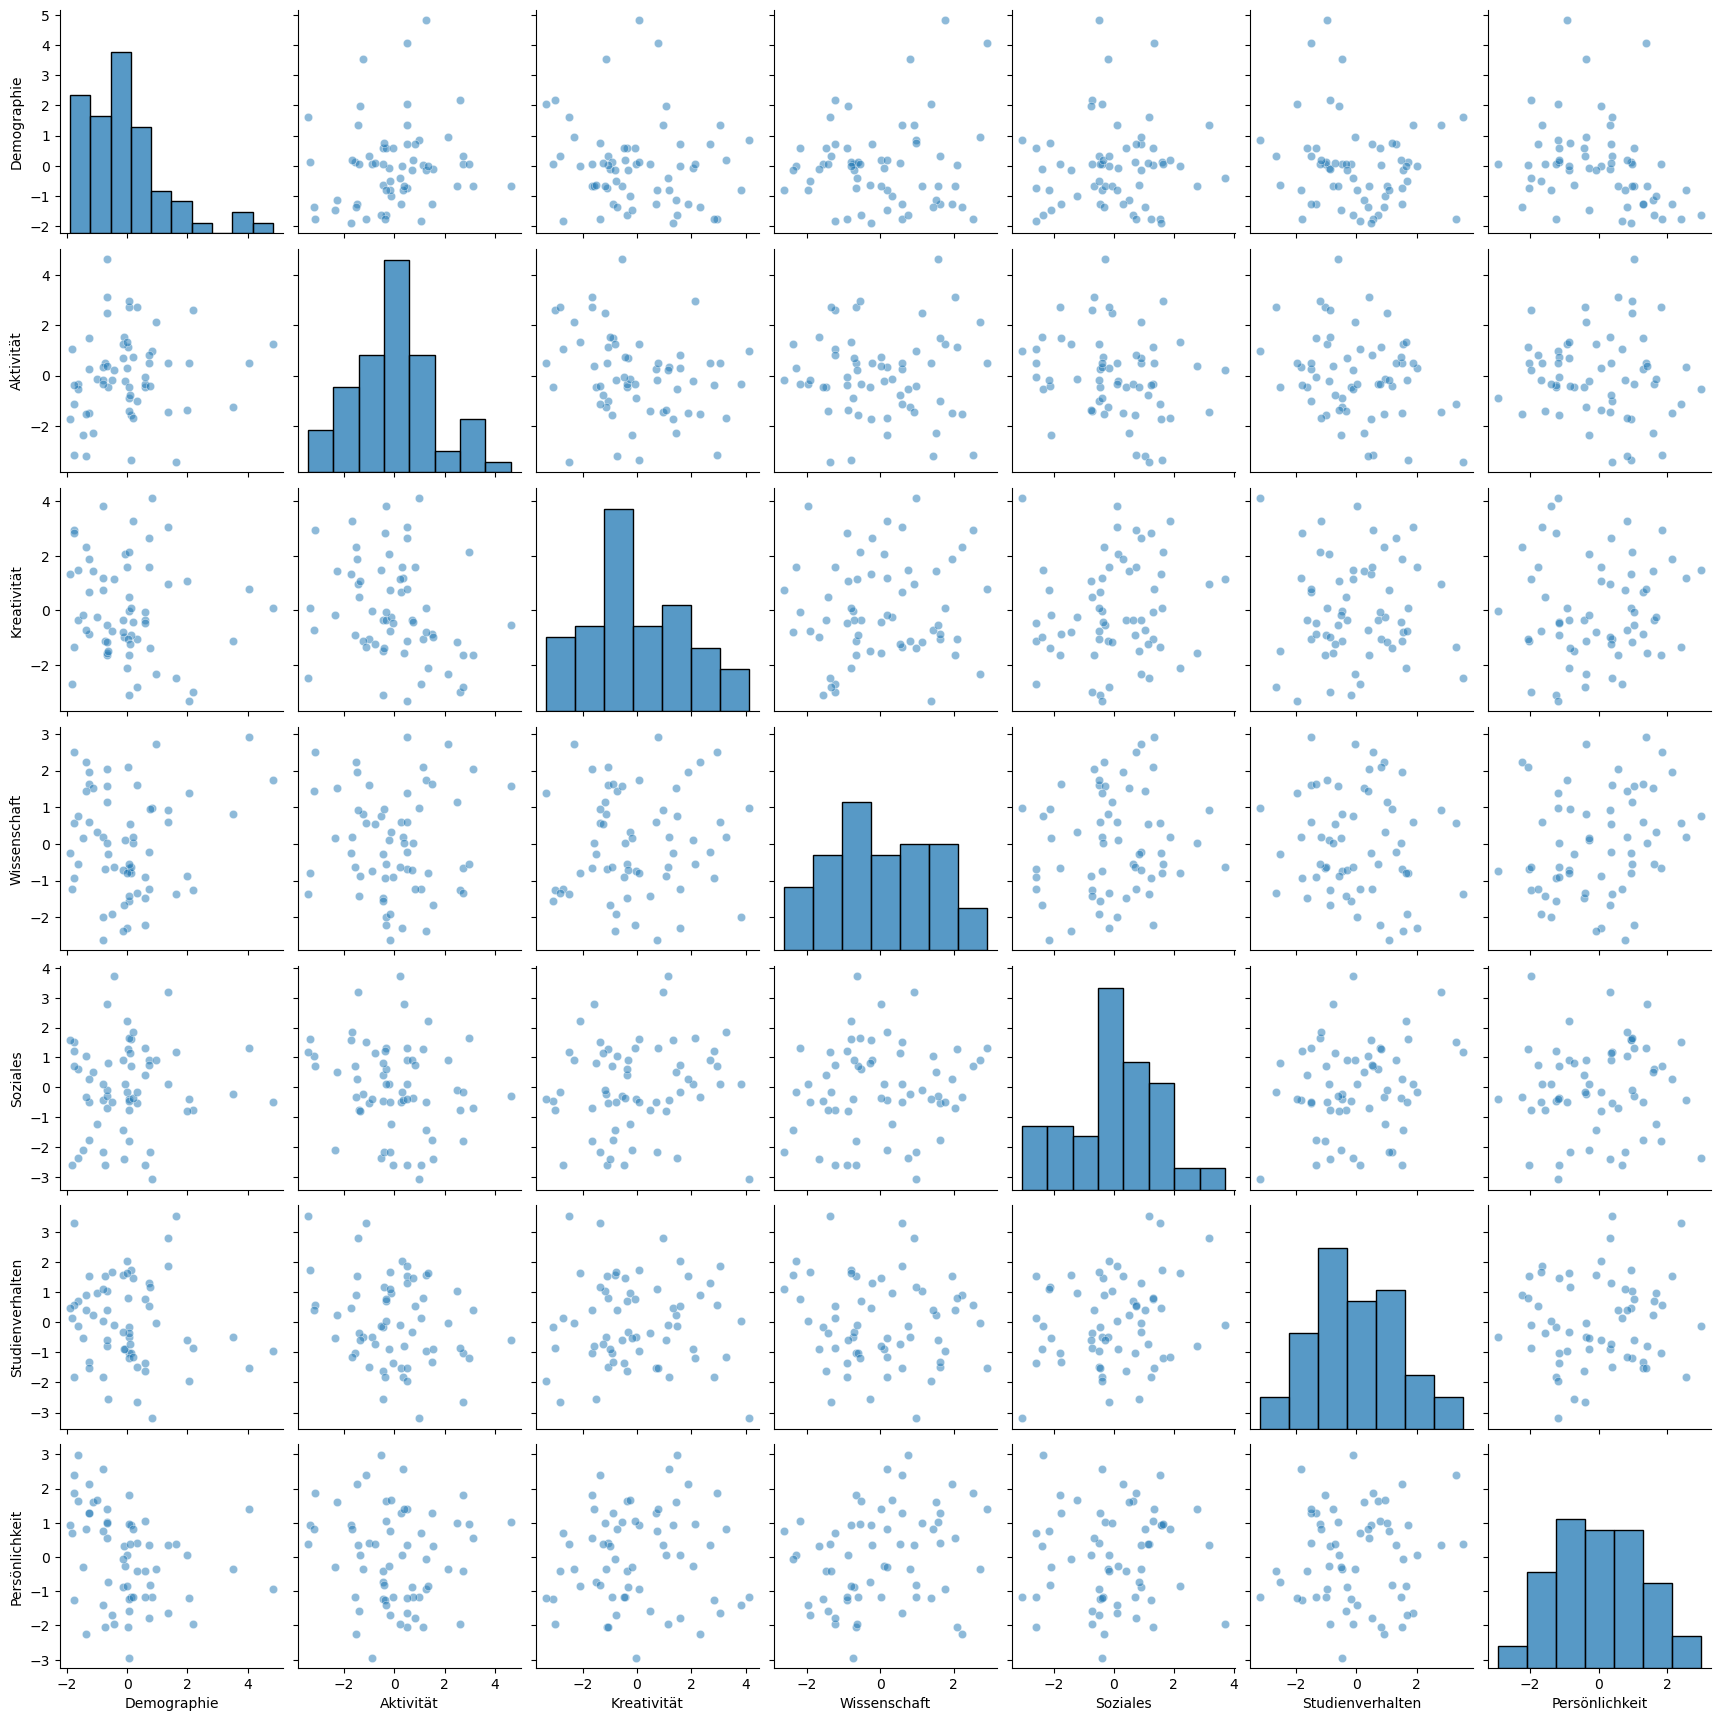

In [44]:
sb.pairplot(data_topics_reduced_pca, plot_kws={'alpha':0.5})

#### Ergebnisse / Beobachtungen
Im Gegensatz zur Berechnung über das arithmetische Mittel sind die Datenpunkte nun deutlich mehr gestreut, wobei in einigen Kombinationen von Themenfeldern kleinere Cluster zu erkennen sind. Auch hier sind im Themenbereich "Demographie" wieder Ausreißer zu erkennen, diesmal jedoch einer mehr als bei der Verwendung des arithmetischen Mittels. Auch diese werden über die Ausgabe der Ursprungsdaten für das Themenfeld noch einmal genauer betrachtet.

### 2.3.2 Nähere Untersuchung der gewonnenen Erkenntnisse

In [ ]:
mask_age_cluster1 = data_topics_reduced_mean[cat_demography[0]] > 5.5
data_topics_reduced_mean[mask_age_cluster1]

,Demographie,Aktivität,Kreativität,Wissenschaft,Soziales,Studienverhalten,Persönlichkeit
6,6.29,0.67,2.33,2.8,2.7,2.50,1.36
8,6.14,0.89,2.00,3.4,3.4,3.17,1.14


In [ ]:
data_encoded.loc[[6, 8]][[columns_encoded[x] for x in cat_demography[1]]]

,Alter,Studiengang Bmi? (encoded),Studiengang Bmt? (encoded),Studiengang Daisy? (encoded),Studiengang Mmi? (encoded),Funktion Student*In? (encoded),Geschlecht (weiblich?)
6,41,0,0,0,1,1,1
8,42,0,0,1,0,0,0


In [45]:
%store data_topics_reduced_pca

Stored 'data_topics_reduced_pca' (DataFrame)


## 2.4 Kernel PCA

Nach dem gleichen Vorgehen wie im vorherigen Kapitel werden die Themenbereiche nun mit Kernel PCA berechnet. Hier ergibt sich das Problem, dass die Konfiguration der benötigten Parameter (bis auf "n_components")  nicht intuitiv ersichtlich ist. Da als Ergebnis zudem sieben Dimensionen (bzw. Features) erzeugt werden, ist ein Vergleich der Ergebnisse mit verschiedenen Parametern nicht wirklich möglich. Stattdessen werden der Kernel "rbf" und der Default-Wert für den Parameter "gamma" genutzt, da diese bei der bisherigen Untersuchung zufriedenstellende Ergebnisse lieferten.

### 2.4.1 Berechnung & Visualisierung der Themenbereiche

In [46]:
kpca = KernelPCA(n_components=1, kernel="rbf")

data_topics_reduced_kpca = compute_categories(data_scaled, kpca)
data_topics_reduced_kpca

,Demographie,Aktivität,Kreativität,Wissenschaft,Soziales,Studienverhalten,Persönlichkeit
0,-0.587912,0.113878,-0.171371,-0.585440,-0.065196,-0.396560,0.373343
1,-0.581340,-0.012626,-0.252510,0.571401,-0.064866,-0.483487,0.385278
2,-0.537711,-0.167822,-0.207035,-0.337822,-0.356242,-0.048434,-0.285392
3,-0.503817,-0.162075,0.546720,-0.047036,0.134251,-0.401802,0.022157
4,-0.339019,0.262010,0.449739,-0.366644,0.054083,0.340576,0.180989
...,...,...,...,...,...,...,...
57,-0.581340,-0.184468,-0.392386,-0.399189,0.235023,-0.441265,0.291530
58,0.143517,0.143899,0.521908,-0.131034,-0.176859,-0.001201,-0.204739
59,0.117564,0.295017,-0.300893,-0.270147,-0.063746,0.293460,0.475380
60,0.073284,0.244054,-0.283723,0.333350,-0.011156,-0.313788,0.582839


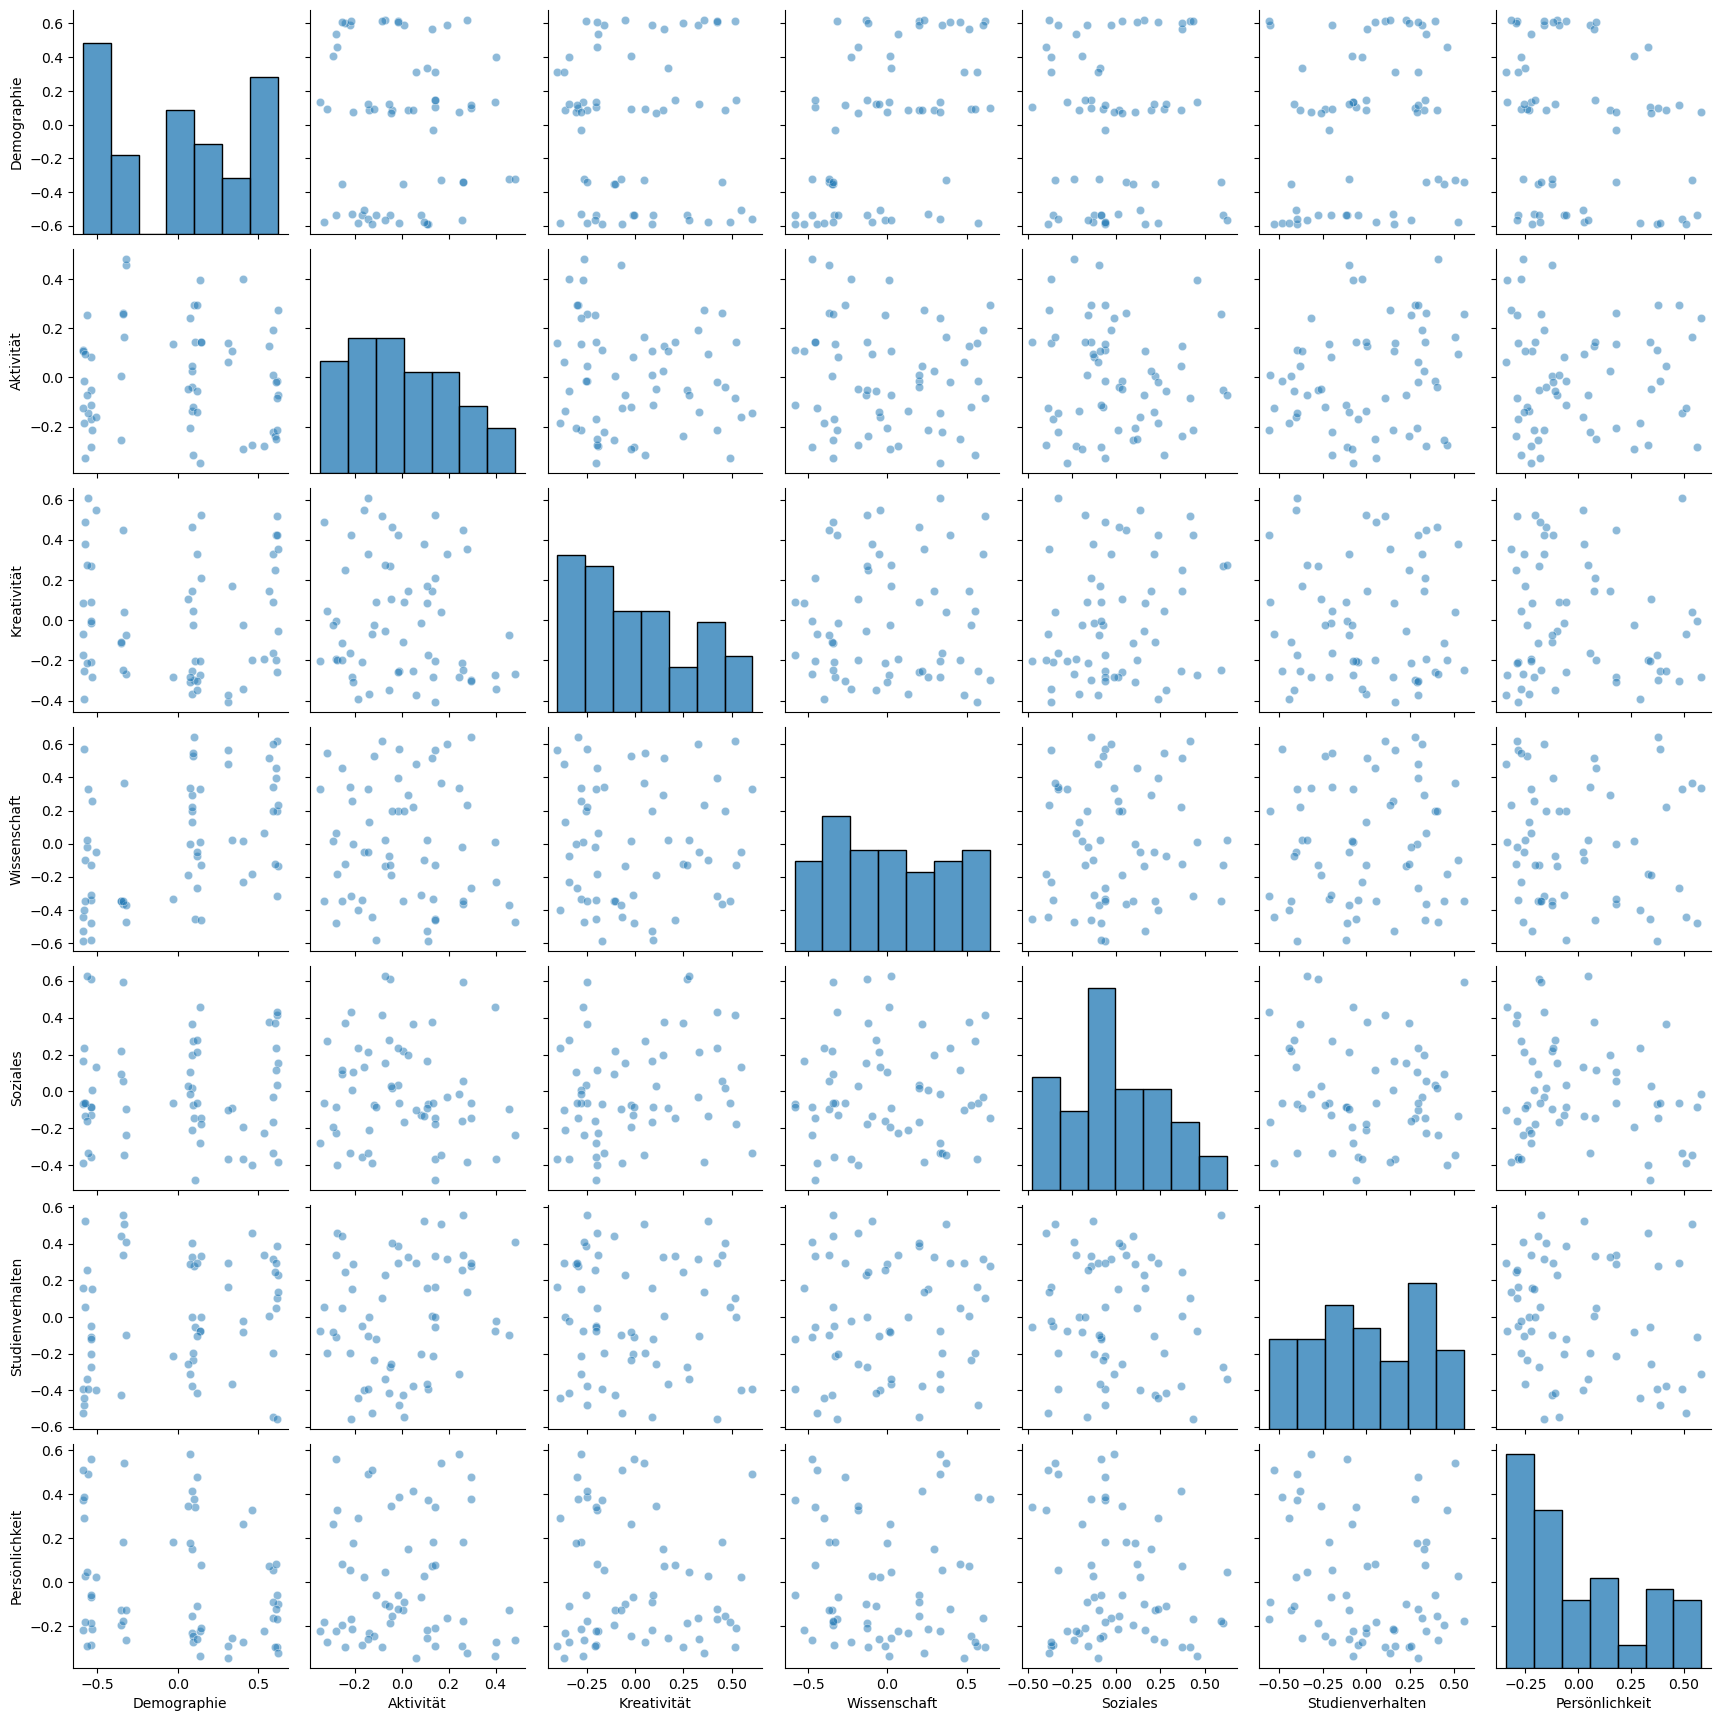

In [47]:
sb.pairplot(data_topics_reduced_kpca, plot_kws={'alpha':0.5})

### 2.4.2 Nähere Untersuchung der gewonnenen Erkenntnisse

Ähnlich zu PCA sind die Datenpunkte relativ stark gestreut. Hier fällt vor allem der Themenbereich "Demographie" auf, der sich in drei clusterartige Strukturen zu gliedern scheint. Diese werden hier noch einmal näher untersucht, indem die Daten bei den "Demographie"-Werten -0.25 und 0.25 getrennt werden.

In [48]:
mask_age_cluster1 = data_topics_reduced_kpca[cat_demography[0]] < -0.25
mask_age_cluster2 = (data_topics_reduced_kpca[cat_demography[0]] >= -0.25) & (data_topics_reduced_kpca[cat_demography[0]] <= 0.25)
mask_age_cluster3 = data_topics_reduced_kpca[cat_demography[0]] > 0.25

data_reduced_PCA_mask1 = data_topics_reduced_kpca[mask_age_cluster1]
data_reduced_PCA_mask2 = data_topics_reduced_kpca[mask_age_cluster2]
data_reduced_PCA_mask3 = data_topics_reduced_kpca[mask_age_cluster3]

In [49]:
data_reduced_PCA_c1 = data_encoded.iloc[data_reduced_PCA_mask1.index]
data_reduced_PCA_c2 = data_encoded.iloc[data_reduced_PCA_mask2.index]
data_reduced_PCA_c3 = data_encoded.iloc[data_reduced_PCA_mask3.index]

data_reduced_PCA_c1 = data_reduced_PCA_c1[[columns_encoded[cat] for cat in cat_demography[1]]]
data_reduced_PCA_c2 = data_reduced_PCA_c2[[columns_encoded[cat] for cat in cat_demography[1]]]
data_reduced_PCA_c3 = data_reduced_PCA_c3[[columns_encoded[cat] for cat in cat_demography[1]]]

In [50]:
data_reduced_PCA_c1.describe()

,Alter,Studiengang Bmi? (encoded),Studiengang Bmt? (encoded),Studiengang Daisy? (encoded),Studiengang Mmi? (encoded),Funktion Student*In? (encoded),Geschlecht (weiblich?)
count,24.000000,24.0,24.0,24.0,24.0,24.0,24.000000
mean,25.916667,0.0,0.0,0.0,1.0,1.0,0.291667
std,2.518051,0.0,0.0,0.0,0.0,0.0,0.464306
min,23.000000,0.0,0.0,0.0,1.0,1.0,0.000000
25%,24.000000,0.0,0.0,0.0,1.0,1.0,0.000000
50%,25.000000,0.0,0.0,0.0,1.0,1.0,0.000000
75%,28.000000,0.0,0.0,0.0,1.0,1.0,1.000000
max,31.000000,0.0,0.0,0.0,1.0,1.0,1.000000


In [51]:
data_reduced_PCA_c2.describe()

,Alter,Studiengang Bmi? (encoded),Studiengang Bmt? (encoded),Studiengang Daisy? (encoded),Studiengang Mmi? (encoded),Funktion Student*In? (encoded),Geschlecht (weiblich?)
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,28.052632,0.368421,0.526316,0.052632,0.052632,0.842105,0.315789
std,5.729783,0.495595,0.512989,0.229416,0.229416,0.374634,0.477567
min,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,27.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,29.500000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,42.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
data_reduced_PCA_c3.describe()

,Alter,Studiengang Bmi? (encoded),Studiengang Bmt? (encoded),Studiengang Daisy? (encoded),Studiengang Mmi? (encoded),Funktion Student*In? (encoded),Geschlecht (weiblich?)
count,19.000000,19.0,19.0,19.0,19.0,19.0,19.000000
mean,22.526316,0.0,0.0,1.0,0.0,1.0,0.263158
std,3.272247,0.0,0.0,0.0,0.0,0.0,0.452414
min,18.000000,0.0,0.0,1.0,0.0,1.0,0.000000
25%,19.500000,0.0,0.0,1.0,0.0,1.0,0.000000
50%,22.000000,0.0,0.0,1.0,0.0,1.0,0.000000
75%,24.500000,0.0,0.0,1.0,0.0,1.0,0.500000
max,28.000000,0.0,0.0,1.0,0.0,1.0,1.000000


#### Ergebnisse / Beobachtungen
Anhand der Plots und der näheren Ausgabe der drei getrennten Datenmengen ist zu erkennen, dass Kernel PCA insb. innerhalb des Themenfeldes "Demographie" die Datenpunkte systematisch getrennt hat. So befinden sich im "Cluster 1", in dem alle Datenpunkte mit "Demographie"-Werten unter -0.25 zu finden sind, ausschließlich MMI-Studierende. Im "Cluster 2" befinden sich hingegen alle BMI-Student*innen und nicht-Studierende wie z. B. Dozent\*innen, während "Cluster 3" ausschließlich DAISY-Studierende umfasst. Diese Cluster-Einteilung wird später noch einmal mit den von den Clustering-Algorithmen berechneten Einteilungen verglichen.

In [53]:
%store data_topics_reduced_kpca

Stored 'data_topics_reduced_kpca' (DataFrame)


## 2.5 t-SNE

Ähnlich wie bei dem Vorgehen für Kernel PCA wird auch für t-SNE der Parameter "n_components" auf 1 gesetzt, und der "perplexity"-Parameter basierend auf den Erfahrungen aus Kapitel 1 mit dem Default-Wert 30 genutzt.

In [54]:
tsne = TSNE(n_components=1, random_state=0)

data_topics_reduced_tsne = compute_categories(data_scaled, tsne)
data_topics_reduced_tsne

,Demographie,Aktivität,Kreativität,Wissenschaft,Soziales,Studienverhalten,Persönlichkeit
0,-3.119780,-1.055389,2.115113,-2.102802,-0.963761,-3.017568,-7.478622
1,-3.277016,-2.011001,2.081236,1.051564,-1.216722,-3.530753,-7.129253
2,-3.574540,-0.677306,6.600844,-1.477640,-2.521754,-2.743463,-4.196132
3,-3.672833,0.086896,8.164504,-0.471056,0.083891,-3.484990,-8.414960
4,-2.037802,-0.701284,8.155038,-2.755713,-0.496484,0.512413,-7.096321
...,...,...,...,...,...,...,...
57,-3.277016,-2.698035,4.447560,-2.830156,0.469239,-3.776809,-6.906602
58,-0.627089,-1.988870,8.669700,-2.482596,-1.944232,-1.471967,-9.284055
59,-0.178868,-1.112061,4.909409,-2.122269,-0.663276,0.439378,-7.686540
60,2.452790,-1.228287,3.423741,1.443937,-1.041870,-3.094434,-7.554065


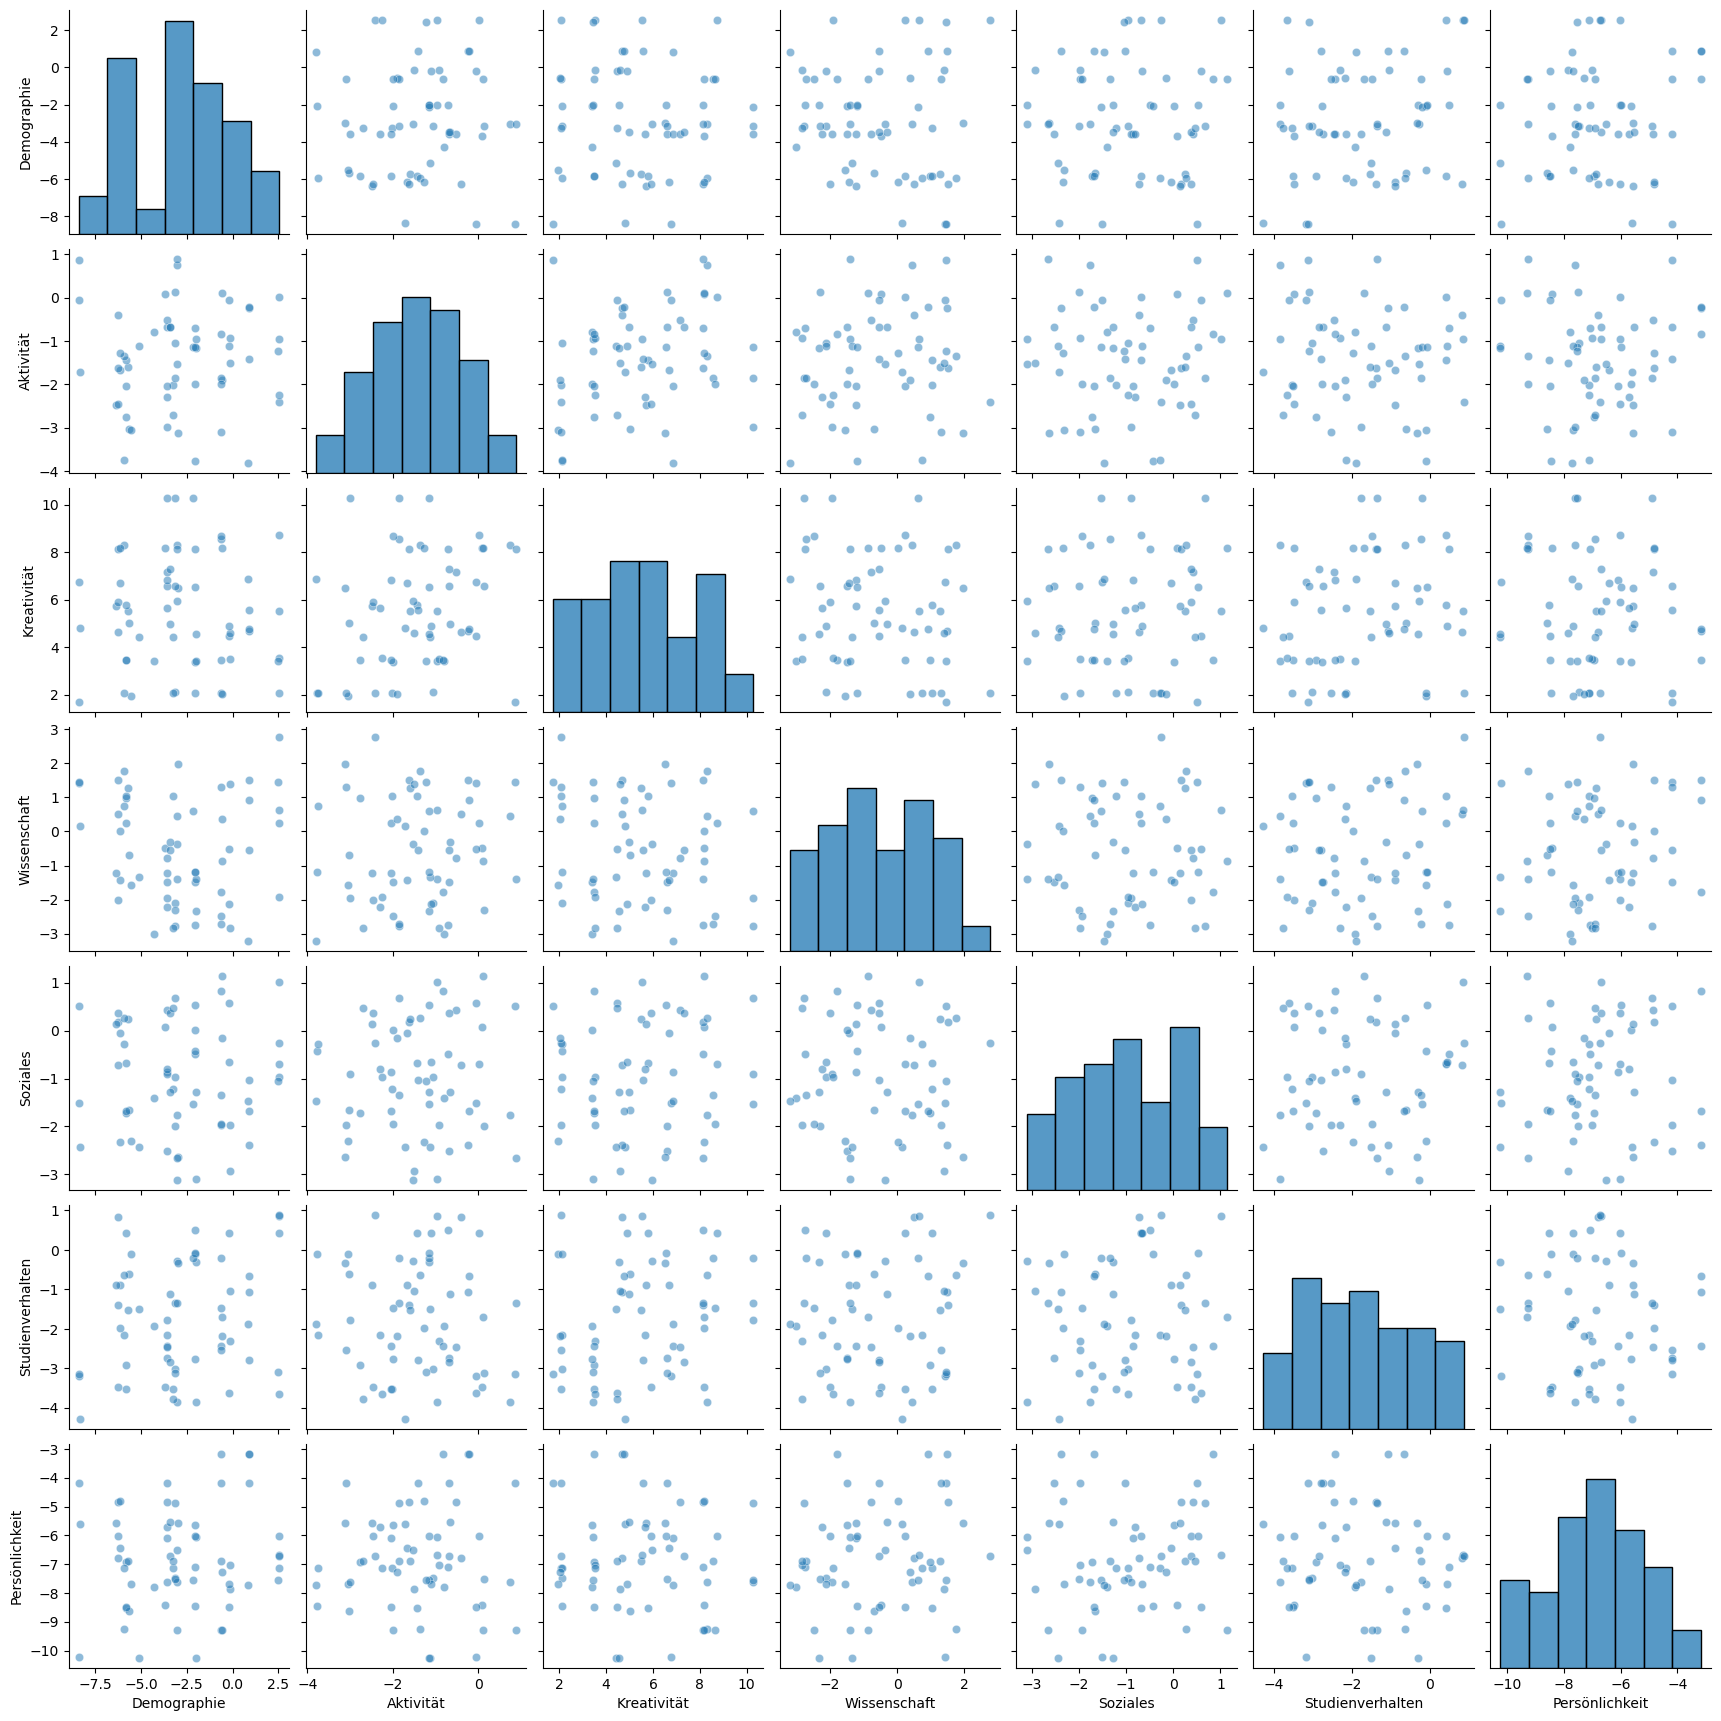

In [55]:
sb.pairplot(data_topics_reduced_tsne, plot_kws={'alpha':0.5})

#### Ergebnisse / Beobachtungen
Ähnlich zu den Ergebnissen von (Kernel) PCA sind die Daten gestreut, wobei in einigen Plots wie z. B. denen mit dem Themenfeld "Kreativität" kleinere, streifenartige Strukturen zu erkennen sind. Da diese aber weniger ausgeprägt sind als bspw. die Trennung der "Demographie"-Werte im (Kernel) PCA, werden die Ergebnisse vorerst nicht weiter untersucht.

In [56]:
%store data_topics_reduced_tsne

Stored 'data_topics_reduced_tsne' (DataFrame)
